# Données de Restaurant

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9) } , font_scale=1.5 , style='whitegrid' )
sns.set_palette("Set1")

# charger le csv

In [16]:
tips = sns.load_dataset('tips')

In [17]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# résumé statistique

In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Distribution de la facture totale + statistique sommaire

#### La ligne rouge représente la moyenne
#### La ligne bleue représente la médiane
#### Les deux lignes violette représentent les quantiles ( 25% , 75% )

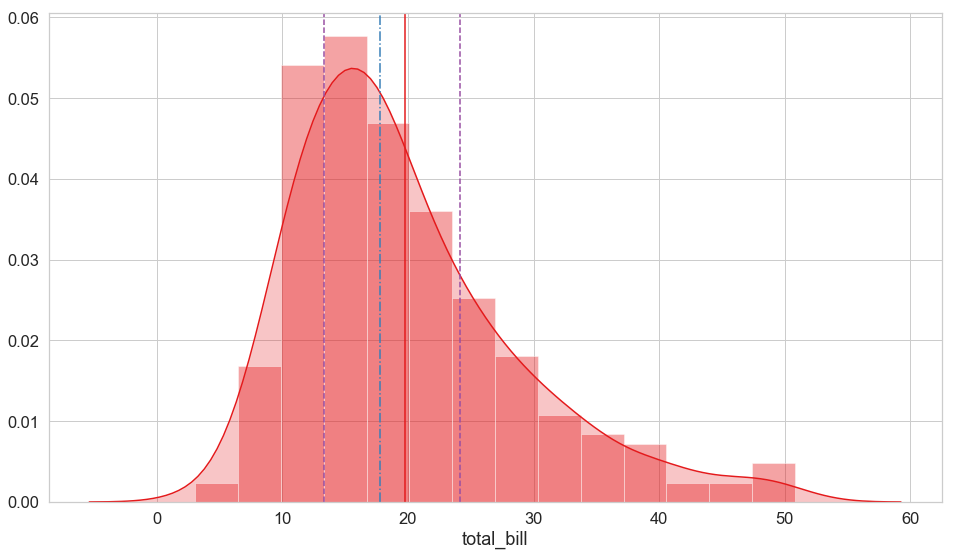

In [20]:
sns.distplot(tips['total_bill'] ,kde_kws={"shade": True} )
plt.axvline(tips['total_bill'].mean())
plt.axvline(tips['total_bill'].median() , c='C1' , linestyle='-.')
plt.axvline(tips['total_bill'].quantile(0.25) , c='C3' , linestyle='--')
plt.axvline(tips['total_bill'].quantile(0.75) , c='C3' , linestyle='--')

# Corrélation entre les colonnes numériques

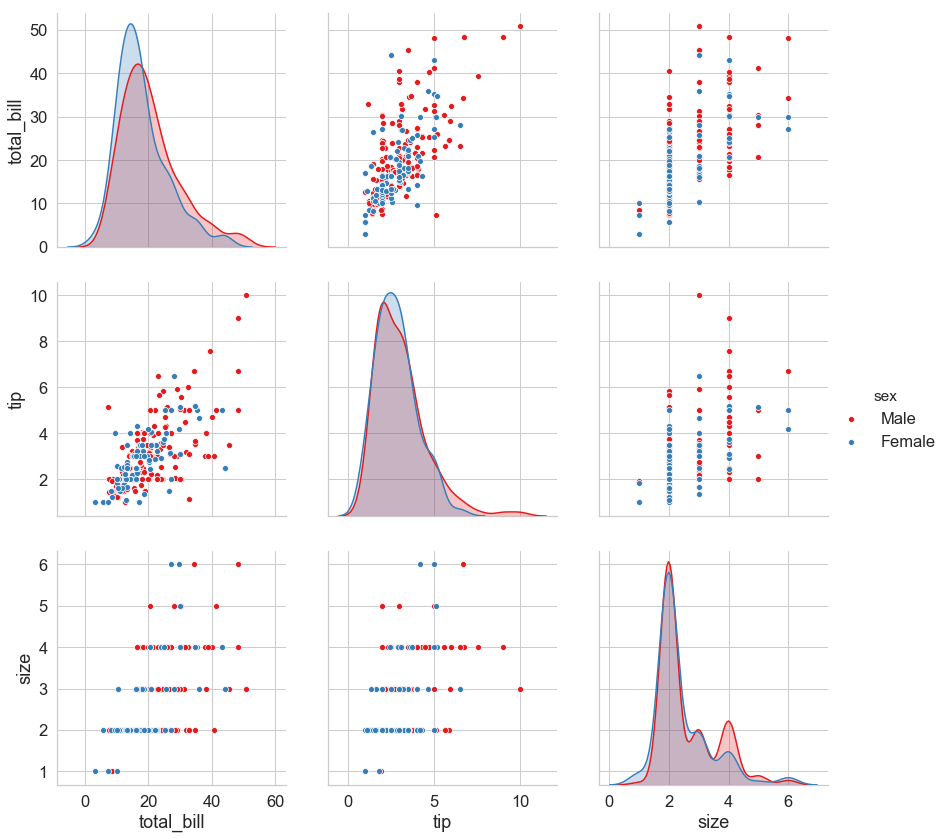

In [21]:
sns.pairplot(tips , hue='sex' , height=4)

# Facture totale pour 4 jours pour 2 sexes

#### Il semble que en jeudi les deux sexes paient les factures également (un peupret ), en vendredi les femmes ne dépensent pas plus de 25 £, et en samedi et dimanche il semble que les hommes payents les factures , la plupart des hommes sont prêts à payer pour leur femme ,  

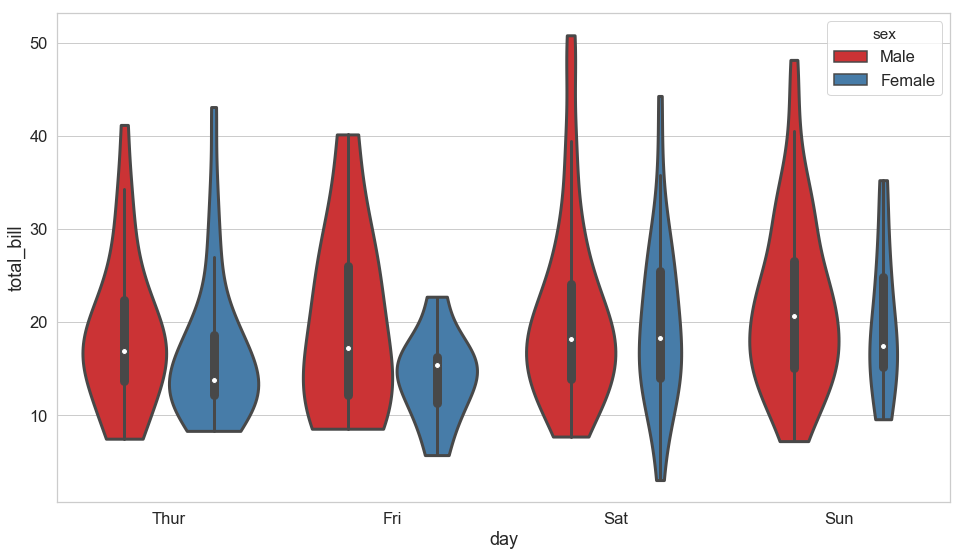

In [22]:
sns.violinplot(data=tips , x='day' , y='total_bill',scale="count" , hue='sex',linewidth=3, cut=0)

# Facture totale pour 4 jours pour fumeurs et non-fumeurs

#### nous remarquons une faible apparition de fumeurs jeudi et dimanche, mais de l’autre côté, le vendredi a l’aspect le plus bas de non-fumeurs, samedi est un grand jour pour les deux types de clients

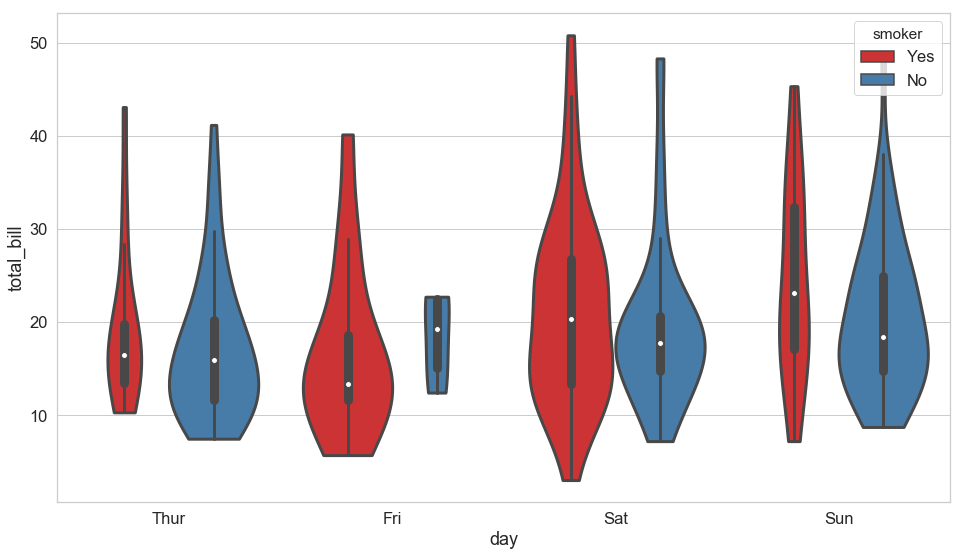

In [23]:
sns.violinplot(data=tips , x='day' , y='total_bill',scale="count" , hue='smoker',linewidth=3, cut=0)

# Facture totale pour 4 jours pour le déjeuner et le dîner

#### samedi et dimanche, les clients ne viennent au restaurant que pour le dîner, le vendredi a peu de clients qui viennent pour le déjeuner, et jeudi est unique parce que les clients ne viennent que pour le déjeuner, avec une seule apparence pour le dîner.

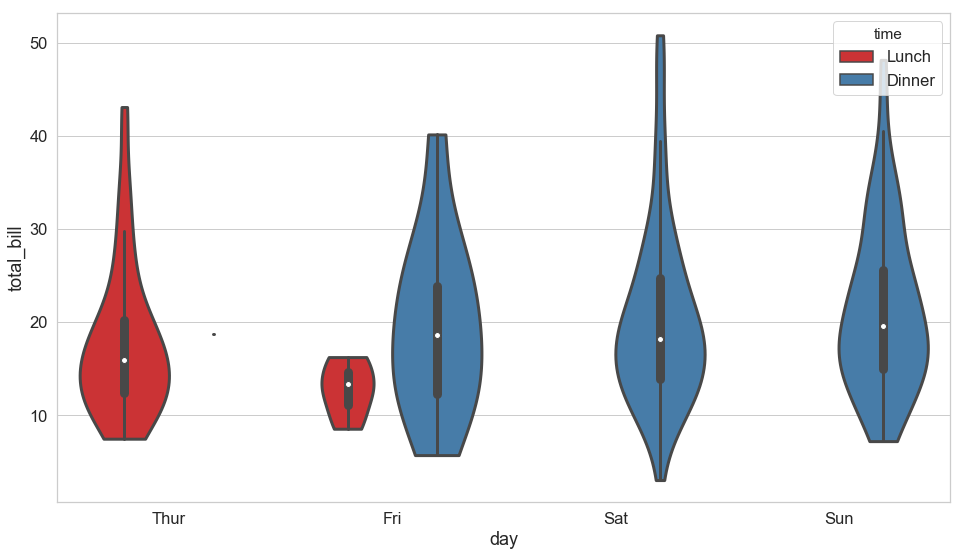

In [24]:
sns.violinplot(data=tips , x='day' , y='total_bill',scale="count" , hue='time',linewidth=3 , cut=0)

# Un aperçu général de la façon dont la facture totale au restaurant est affectée par le sexe, le temps, les fumeurs et les jours.

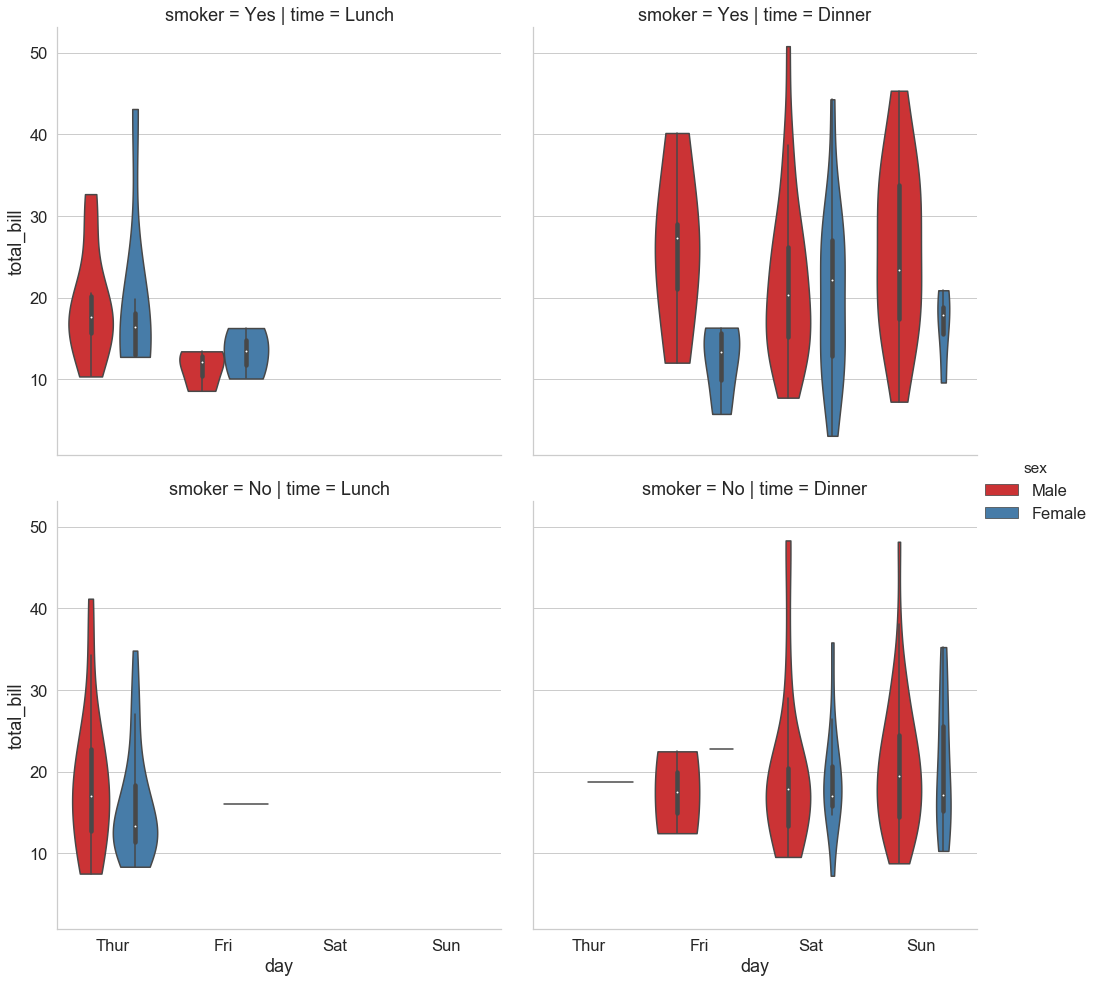

In [25]:
sns.catplot(data=tips , x='day' , y='total_bill' , kind='violin',scale="count" , cut=0, hue='sex' , col='time' , row='smoker',height=7)

# Un aperçu général du pourboire (tips) au restaurant en fonction du sexe, le temps, les fumeurs et les jours.

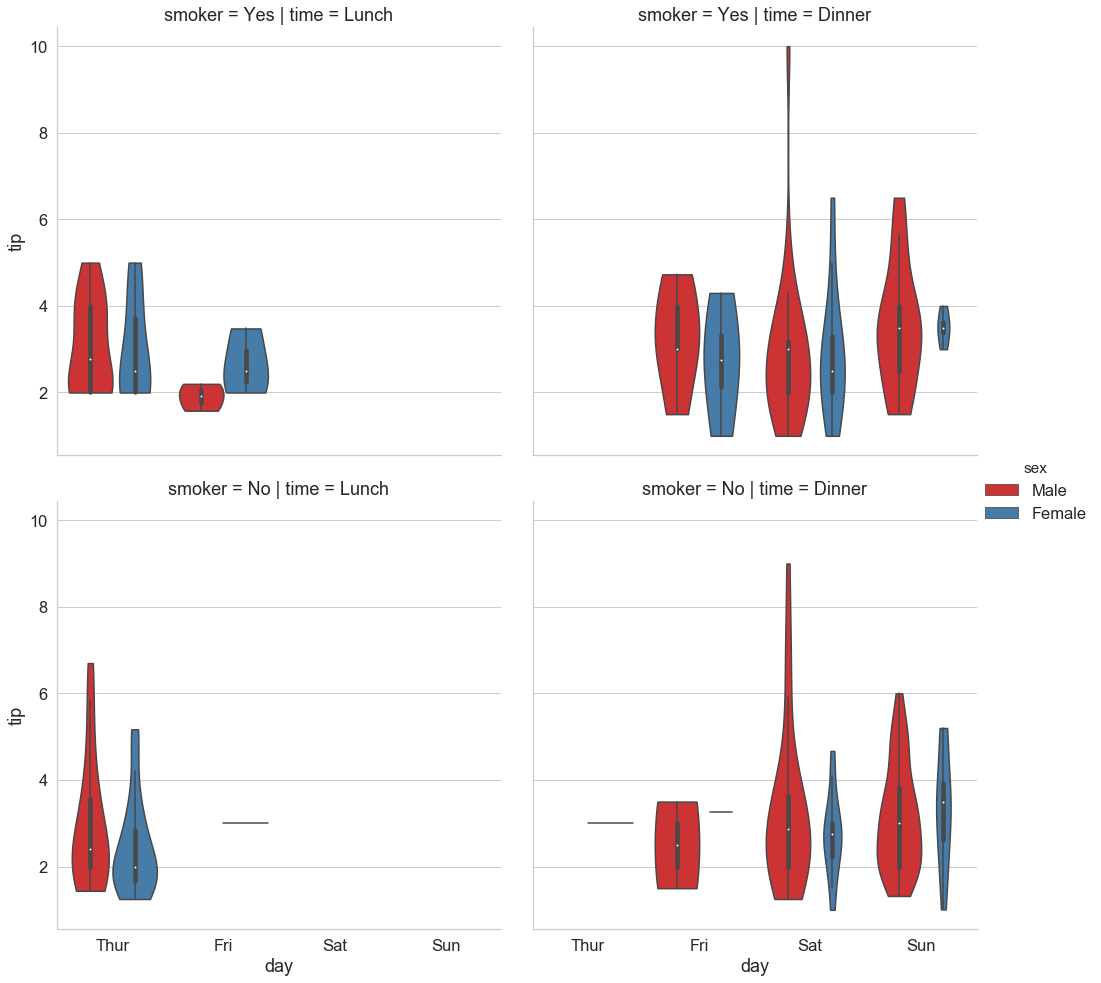

In [26]:
sns.catplot(data=tips , x='day' , y='tip' , kind='violin',scale="count" , cut=0, hue='sex' , col='time' , row='smoker',height=7)

# Relation entre la facture totale et le pourboire offert par les clients selon le sexe, le temps n et les fumeurs avec régression linéaire

(0, 60, 0, 11)

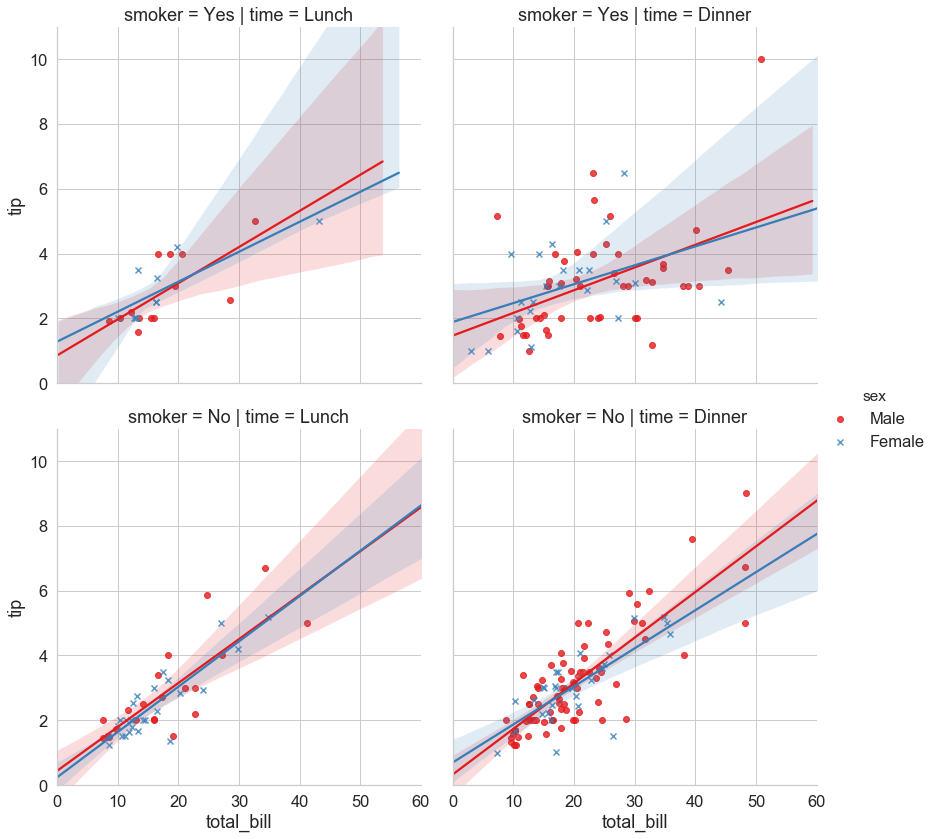

In [27]:
sns.lmplot(data=tips , x='total_bill' , y='tip' , hue='sex' ,markers=["o", "x"], col='time' , row='smoker',height=6,order=1)
plt.axis(ymin=0 , ymax=11 , xmin=0 , xmax=60)